# 01-Pytorch Basics

In [1]:
import torch
import torchvision
import torch.nn as nn
import numpy as np
import torchvision.transforms as transforms

In [2]:
# ================================================================== #
#                     1. Basic autograd example 1                    #
# ================================================================== #


# Create tensors

x = torch.tensor(1., requires_grad=True)

w = torch.tensor(2., requires_grad=True)

b = torch.tensor(3., requires_grad=True)

# Build a computational graph

y = w * x + b # y = 2 * x + 3

# Compute gradients

y.backward()

# Print out the gradients.

print(x.grad)

print(w.grad)

print(b.grad)

tensor(2.)
tensor(1.)
tensor(1.)


In [8]:
# ================================================================== #
#                    2. Basic autograd example 2                     #
# ================================================================== #


#Create tensors of shape (10, 3) and (10, 2).
x = torch.randn(10, 3)

y = torch.randn(10, 2)

# Build a fully conneted layer

linear = nn.Linear(3, 2)

print('w: ',linear.weight)

print('b: ',linear.bias)

# Build loss function and optimizer

criterion = nn.MSELoss()

optimizer = torch.optim.SGD(linear.parameters(), lr=0.01)

# Forward loss

pred = linear(x)

# Compute loss

loss = criterion(pred, y)

print('loss: ', loss.item())

# Backward pass

loss.backward()

# Printout the gradients.

print('dL/dw: ',linear.weight.grad)

print('dL/db: ',linear.bias.grad)

# 1-step gradient descent

optimizer.step()


# You can also perform gradient descent at the low level.
# linear.weight.data.sub_(0.01 * linear.weight.grad.data)
# linear.bias.data.sub_(0.01 * linear.bias.grad.data)

# Print out the loss after 1-step gradient descent

pred = linear(x)

loss = criterion(pred, y)

print('loss after 1 step optimization: ', loss.item())



w:  Parameter containing:
tensor([[ 0.3084, -0.1143,  0.4611],
        [ 0.5533,  0.0310, -0.2710]], requires_grad=True)
b:  Parameter containing:
tensor([ 0.1721, -0.4625], requires_grad=True)
loss:  1.8482630252838135
dL/dw:  tensor([[-0.1160, -0.9347,  0.7111],
        [ 0.8074,  0.0883, -0.4526]])
dL/db:  tensor([-0.1386, -0.6959])
loss after 1 step optimization:  1.820837378501892


In [9]:
# ================================================================== #
#                     3. Loading data from numpy                     #
# ================================================================== #

# Create a numpy array.

x = np.array([[1, 2], [3, 4]])

print(x)

# Convert the numpy array to a torch tensor

y = torch.from_numpy(x)

print(y)

# Convert the torch tensor to a numpy array

z = y.numpy()

print(z)

[[1 2]
 [3 4]]
tensor([[1, 2],
        [3, 4]], dtype=torch.int32)
[[1 2]
 [3 4]]


In [12]:
# ================================================================== #
#                         4. Input pipeline                           #
# ================================================================== #

# Download and construct CIFAR-10 dataset.

train_dataset = torchvision.datasets.CIFAR10(root='../../CIFAR10_DATA',
                                            
                                             train = True,
                                            
                                     transform = transforms.ToTensor(),
                                            
                                             download=True)

# Fetch one data pair (read data from disk)

image, label = train_dataset[0]

print(image.size())

print(label)

# Data loader (this provides queues and threads in a very simple way).

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          
                                           batch_size=64,
                                          
                                           shuffle=True)

# When iteration starts, queue and thread start to load data from files

data_iter = iter(train_loader)

# Mini-batch images and labels.

images, labels = data_iter.next()

# Actural usage of the data loader is as below.

for images, labels in train_loader:
    
    #Training code should be written here.
    
    pass

Files already downloaded and verified
torch.Size([3, 32, 32])
6


In [13]:
# ================================================================== #
#                5. Input pipeline for custom dataset                 #
# ================================================================== #

# You should build your custom dataset as below

class CustomDataset(torch.utils.data.Dataset):
    
    def __init__(self):
        
        # TODO
        
        # 1.Initialize file paths or a list of file names.
        
        pass
    
    def __getitem__(self, index):
        
        # TODO
        
        # 1. Read one data from file (e.g. using numpy.fromfile, PT;.Image.open)
        
        # 2.Preprocess the data (e.g. torchvision.Transform).
        
        # 3.Return a data pair (e.g. image and label)
        
        pass
    
    def __len__(self):
        
        # You should change 0 to the total size of your dataset.
        
        return 0

# You can then use the prebuilt data loader.

custom_dataset = CustomDataset()

train_loader = torch.utils.data.DataLoader(dataset=custom_dataset,
                                          
                                           batch_size=64,
                                          
                                           shuffle=True)

ValueError: num_samples should be a positive integer value, but got num_samples=0

In [14]:
# ================================================================== #
#                        6. Pretrained model                         #
# ================================================================== #

# Download and load the pretrained ResNet-18.

resnet = torchvision.models.resnet18(pretrained=True)

# If you want to finetune only the top layer of the model, set as below.

for param in resnet.parameters():
    
    param.requires_grad = False
    
# Replace the top layer for finetuning.

resnet.fc = nn.Linear(resnet.fc.in_features, 100) # 100 is an example

# Fordward pass

images = torch.randn(64, 3, 224, 224)

outputs = resnet(images)

print(outputs.size())

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to C:\Users\10449/.cache\torch\checkpoints\resnet18-5c106cde.pth

100%|█████████████████████████████████████████████████████████████████| 46827520/46827520 [00:20<00:00, 2306787.80it/s]


torch.Size([64, 100])


In [16]:
# ================================================================== #
#                      7. Save and load the model                    #
# ================================================================== #

# Save  and load the entire model.

torch.save(resnet,'model.ckpt')

model = torch.load('model.ckpt')

# Save and load only the model parameters(recommended)

torch.save(resnet.state_dict(),'param.ckpt')

resnet.load_state_dict(torch.load('param.ckpt'))

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

# 02-Linear Regression

Epoch [5/60], Loss:0.6502
Epoch [10/60], Loss:0.4222
Epoch [15/60], Loss:0.3297
Epoch [20/60], Loss:0.2921
Epoch [25/60], Loss:0.2767
Epoch [30/60], Loss:0.2703
Epoch [35/60], Loss:0.2676
Epoch [40/60], Loss:0.2663
Epoch [45/60], Loss:0.2656
Epoch [50/60], Loss:0.2652
Epoch [55/60], Loss:0.2649
Epoch [60/60], Loss:0.2646


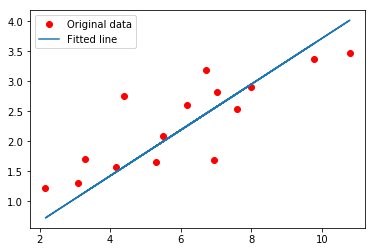

In [23]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt

#Hyper-parameters

input_size = 1

output_size = 1

num_epochs = 60

learning_rate = 0.001

# Toy dataset

x_train = np.array([[3.3],[4.4],[5.5],[6.71],[6.93],[4.168],
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

# print(x_train)

# print(y_train)

# Linear regression model

model = nn.Linear(input_size, output_size)

# Loss and optimizer

criterion = nn.MSELoss()

optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)

# Train the model

for epoch in range(num_epochs):
    
    # Convert numpy arrays to torch tensors
    
    inputs = torch.from_numpy(x_train)
    
    targets = torch.from_numpy(y_train)
    
    # Forward pass
    
    outputs = model(inputs)
    
    loss = criterion(outputs, targets)
    
    # Backward and optimize
    
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()
    
    if (epoch+1) % 5 == 0:
        
        print('Epoch [{}/{}], Loss:{:.4f}'.format(epoch+1, num_epochs,loss.item()))

        
# Plot the graph

predicted = model(torch.from_numpy(x_train)).detach().numpy()

plt.plot(x_train, y_train, 'ro',label='Original data')

plt.plot(x_train, predicted, label='Fitted line')

plt.legend()

plt.show()

# Save the model checkpoint

torch.save(model.state_dict(),'model.ckpt')

# 03-Logistic Regression

In [24]:
import torch 

import torchvision

import torch.nn as nn

import torchvision 

import torchvision.transforms as transforms

# Hyper-parameters

input_size = 28 * 28 # 784

num_classes = 10

num_epochs = 5

batch_size = 100

learning_rate = 0.001

# MNIST dataset(images and labels)

train_dataset = torchvision.datasets.MNIST(root='../../MNIST_DATA',
                                          
                                           train=True,
                                          
                                transform = transforms.ToTensor(),
                                          
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='../../MNIST_DATA',
                                         
                                          train=False,
                                         
                                transform = transforms.ToTensor())

# Data loader(input pipeline)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          
                                           batch_size=batch_size,
                                          
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                         
                                          batch_size=batch_size,
                                         
                                          shuffle=False)
# Logistic regression model

model = nn.Linear(input_size, num_classes)

# Loss and optimizer

# nn.CrossEntropyLoss() computes softmax internally

criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Train the model

total_step = len(train_loader)

for epoch in range(num_epochs):
    
    for i, (images, labels) in enumerate(train_loader):
        
        # Reshape images to (batch_size, input_size)
        
        images = images.reshape(-1, input_size)
        
        # Forward pass
        
        outputs = model(images)
        
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
        
        if (i + 1) % 100 ==0:
            
            print('Epoch [{}/{}], Step[{}/{}], Loss:{:.4f}'
                   .format(epoch+1, num_epochs,i+1,total_step,loss.item()))
            
# Test the model

# In test phase, we don't need to compute gradients (for memory efficiency)

with torch.no_grad():
    
    correct = 0
    
    total = 0.001
    for images, labels in test_loader:
        
        images = images.reshape(-1, input_size)
        
        outputs = model(images)
        
        _, predicted = torch.max(outputs.data, 1)
        
        total += labels.size(0)
        
        correct += (predicted == labels).sum()
        
    print('Accuracy of the model on the 10000 test images:{} %'.format(100 *correct/total))
    
# Save the model checkpoint

torch.save(model.state_dict, 'model.ckpt')


0it [00:00, ?it/s]


100%|██████████████████████████████████████████████████████████████████▉| 9912320/9912422 [00:18<00:00, 1255170.91it/s]

Extracting ../../MNIST_DATA\MNIST\raw\train-images-idx3-ubyte.gz




0it [00:00, ?it/s]



  0%|                                                                                        | 0/28881 [00:00<?, ?it/s]

 57%|█████████████████████████████████████████▍                               | 16384/28881 [00:00<00:00, 73860.22it/s]


0it [00:00, ?it/s]

Extracting ../../MNIST_DATA\MNIST\raw\train-labels-idx1-ubyte.gz





  0%|                                                                                      | 0/1648877 [00:00<?, ?it/s]


  1%|█                                                                     | 24576/1648877 [00:00<00:08, 181187.53it/s]


  3%|██▍                                                                   | 57344/1648877 [00:01<00:08, 178735.78it/s]


  6%|████▏                                                                 | 98304/1648877 [00:01<00:07, 210064.19it/s]


  8%|█████▍                                                               | 131072/1648877 [00:01<00:08, 169570.08it/s]


 12%|████████▏                                                            | 196608/1648877 [00:01<00:07, 203272.52it/s]


 15%|██████████▋                                                          | 253952/1648877 [00:01<00:05, 235099.02it/s]


 21%|██████████████▋                                                      | 352256/1648877 [00:01<00:04, 301353.63it/s]


 25%|████████████████

Extracting ../../MNIST_DATA\MNIST\raw\t10k-images-idx3-ubyte.gz





8192it [00:00, 14637.48it/s]                                                                                           


Extracting ../../MNIST_DATA\MNIST\raw\t10k-labels-idx1-ubyte.gz
Processing...
Done!
Epoch [1/5], Step[100/600], Loss:2.2151
Epoch [1/5], Step[200/600], Loss:2.1188
Epoch [1/5], Step[300/600], Loss:2.0234



9920512it [00:30, 1255170.91it/s]                                                                                      

Epoch [1/5], Step[400/600], Loss:2.0041
Epoch [1/5], Step[500/600], Loss:1.8242
Epoch [1/5], Step[600/600], Loss:1.7821
Epoch [2/5], Step[100/600], Loss:1.7415
Epoch [2/5], Step[200/600], Loss:1.6342
Epoch [2/5], Step[300/600], Loss:1.5488
Epoch [2/5], Step[400/600], Loss:1.5640




32768it [00:20, 73860.22it/s]                                                                                          

Epoch [2/5], Step[500/600], Loss:1.5202
Epoch [2/5], Step[600/600], Loss:1.4379
Epoch [3/5], Step[100/600], Loss:1.3829
Epoch [3/5], Step[200/600], Loss:1.3647
Epoch [3/5], Step[300/600], Loss:1.3004
Epoch [3/5], Step[400/600], Loss:1.3770
Epoch [3/5], Step[500/600], Loss:1.2389
Epoch [3/5], Step[600/600], Loss:1.2647
Epoch [4/5], Step[100/600], Loss:1.3314
Epoch [4/5], Step[200/600], Loss:1.2636
Epoch [4/5], Step[300/600], Loss:1.1705
Epoch [4/5], Step[400/600], Loss:1.1314
Epoch [4/5], Step[500/600], Loss:1.1017
Epoch [4/5], Step[600/600], Loss:1.1142
Epoch [5/5], Step[100/600], Loss:1.0518
Epoch [5/5], Step[200/600], Loss:1.1424
Epoch [5/5], Step[300/600], Loss:1.0202
Epoch [5/5], Step[400/600], Loss:1.0351
Epoch [5/5], Step[500/600], Loss:1.0292
Epoch [5/5], Step[600/600], Loss:0.9269
Accuracy of the model on the 10000 test images:82 %


# 04-Feedforeard Neural Network

In [12]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms


# Device configuration
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

device = torch.device('cpu')

# Hyper-parameters 
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='../../MNIST_DATA', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='../../MNIST_DATA', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # Move tensors to the configured device
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))

# Save the model checkpoint
# torch.save(model.state_dict(), 'model.ckpt')

Epoch [1/5], Step [100/600], Loss: 0.2339
Epoch [1/5], Step [200/600], Loss: 0.2258
Epoch [1/5], Step [300/600], Loss: 0.1544
Epoch [1/5], Step [400/600], Loss: 0.1065
Epoch [1/5], Step [500/600], Loss: 0.0707
Epoch [1/5], Step [600/600], Loss: 0.1531
Epoch [2/5], Step [100/600], Loss: 0.1387
Epoch [2/5], Step [200/600], Loss: 0.0856
Epoch [2/5], Step [300/600], Loss: 0.1392
Epoch [2/5], Step [400/600], Loss: 0.0484
Epoch [2/5], Step [500/600], Loss: 0.1519
Epoch [2/5], Step [600/600], Loss: 0.1704
Epoch [3/5], Step [100/600], Loss: 0.0814
Epoch [3/5], Step [200/600], Loss: 0.1305
Epoch [3/5], Step [300/600], Loss: 0.1613
Epoch [3/5], Step [400/600], Loss: 0.0446
Epoch [3/5], Step [500/600], Loss: 0.0609
Epoch [3/5], Step [600/600], Loss: 0.0544
Epoch [4/5], Step [100/600], Loss: 0.1211
Epoch [4/5], Step [200/600], Loss: 0.0286
Epoch [4/5], Step [300/600], Loss: 0.0313
Epoch [4/5], Step [400/600], Loss: 0.0475
Epoch [4/5], Step [500/600], Loss: 0.0228
Epoch [4/5], Step [600/600], Loss:

# 05-Convolution Neural Network

In [9]:
import torch

import torch.nn as nn

import torchvision

import torchvision.transforms as transforms

# Device configuration

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Hyper parameters

num_epochs = 5

num_classes = 10

batch_size = 100

learning_rate = 0.001

# MNIST dataset

train_dataset = torchvision.datasets.MNIST(root='../../MNIST_DATA/',
                                          
                                           train=True,
                                          
                                        transform=transforms.ToTensor(),
                                          
                                          download=True)

test_dataset = torchvision.datasets.MNIST(root='../../MNIST_DATA/',
                                         
                                          train=True,
                                         
                                        transform=transforms.ToTensor(),
                                         
                                          download=True)

# Data Loader

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          
                                           batch_size=batch_size,
                                          
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                         
                                          batch_size=batch_size,
                                         
                                          shuffle=True)

# Convolutional neural network

class ConvNet(nn.Module):
    
    def __init__(self, num_classes=10):
        
        super(ConvNet, self).__init__()
        
        self.layer1 = nn.Sequential(
        
            nn.Conv2d(1, 16, kernel_size=5,stride=1,padding=2),
        
            nn.BatchNorm2d(16),
        
            nn.ReLU(),
        
            nn.MaxPool2d(kernel_size=2, stride=2))
        
        self.layer2 = nn.Sequential(
        
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
        
            nn.BatchNorm2d(32),
        
            nn.ReLU(),
        
            nn.MaxPool2d(kernel_size=2, stride=2))
        
        self.fc = nn.Linear(7*7*32, num_classes)
        
    def forward(self, x):
        
        out = self.layer1(x)
        
        out = self.layer2(out)
        
        out = out.reshape(out.size(0), -1)
        
        out = self.fc(out)

        return out
    
model = ConvNet(num_classes).to(device)

# Loss and optimizer

criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train the model

total_step = len(train_loader)

for epoch in range(num_epochs):
    
    for i, (images, labels) in enumerate(train_loader):
        
        images = images.to(device)
        
        labels = labels.to(device)
        
        # Forward pass
        
        outputs = model(images)
        
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
        
        if (i + 1) % 100 == 0:
            
            print('Epoch [{}/{}], Step[{}/{}], Loss{:.4f}'
                   .format(epoch+1, num_epochs, i+1, total_step,loss.item()))
            
# Test the model
# eval mode (batch)
model.eval()

with torch.no_grad():
    
    correct = 0
    total = 0
    for images, labels in test_loader:
        
        images = images.to(device)
        
        labels = labels.to(device)
        
        outputs = model(images)
        
        _, predicted = torch.max(outputs.data, 1)
        
        total += labels.size(0)
        
        correct += (predicted == labels).sum().item()
        
    print('Test Accuracy of the model on the 10000 test images: {}%'
         
          .format(100* correct / total))
    
# Save the model checkpoint

# torch.save(model.state_dict(), 'model.ckpt')



Epoch [1/5], Step[100/600], Loss0.1723
Epoch [1/5], Step[200/600], Loss0.1653
Epoch [1/5], Step[300/600], Loss0.0828
Epoch [1/5], Step[400/600], Loss0.0925
Epoch [1/5], Step[500/600], Loss0.0141
Epoch [1/5], Step[600/600], Loss0.0561
Epoch [2/5], Step[100/600], Loss0.0638
Epoch [2/5], Step[200/600], Loss0.0660
Epoch [2/5], Step[300/600], Loss0.0277
Epoch [2/5], Step[400/600], Loss0.0735
Epoch [2/5], Step[500/600], Loss0.0220
Epoch [2/5], Step[600/600], Loss0.0145
Epoch [3/5], Step[100/600], Loss0.0327
Epoch [3/5], Step[200/600], Loss0.0566
Epoch [3/5], Step[300/600], Loss0.0194
Epoch [3/5], Step[400/600], Loss0.0302
Epoch [3/5], Step[500/600], Loss0.0534
Epoch [3/5], Step[600/600], Loss0.0031
Epoch [4/5], Step[100/600], Loss0.0150
Epoch [4/5], Step[200/600], Loss0.0535
Epoch [4/5], Step[300/600], Loss0.0275
Epoch [4/5], Step[400/600], Loss0.0090
Epoch [4/5], Step[500/600], Loss0.0183
Epoch [4/5], Step[600/600], Loss0.0071
Epoch [5/5], Step[100/600], Loss0.0100
Epoch [5/5], Step[200/600

# 06-Deep Residual Network

In [5]:
import torch 

import torchvision

import torch.nn as nn

import torchvision.transforms as transforms

# Device configuration

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters

batch_size = 100

num_epochs = 80

learning_rate = 0.001

# Image preprocessing modules

transform = transforms.Compose([
    
    transforms.Pad(4),
    
    transforms.RandomHorizontalFlip(),
    
    transforms.RandomCrop(32),
    
    transforms.ToTensor()
])

# CIFAR-10 dataset

train_dataset = torchvision.datasets.CIFAR10(root='../../CIFAR10_DATA/',
                                            
                                             train=True,                                         
                                             
                                             transform=transforms,
                                              
                                             download=True)

test_dataset = torchvision.datasets.CIFAR10(root='../../CIFAR10_DATA/',
                                           
                                            train=False,
                                           
                                      transform=transforms.ToTensor())

# Data Loader

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          
                                           batch_size=batch_size,
                                          
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                         
                                          batch_size=batch_size,
                                         
                                          shuffle=False)

# 3x3 convolution

def conv3x3(in_channels, out_channels, stride=1):
    
    return nn.Conv2d(in_channels, out_channels, kernel_size=3,
                    
                     stride=stride, padding=1, bias=False)

# Residual block

class ResidualBlock(nn.Module):
    
    def __init__(self, in_channels, out_channels, stride=1, downsample=None):
        
        super(ResidualBlock, self).__init__()
        
        self.conv1 = conv3x3(in_channels, out_channels, stride)
        
        self.bn1 = nn.BatchNorm2d(out_channels)
        
        self.relu = nn.ReLU(inplace=True)
        
        self.conv2 = conv3x3(out_channels, out_channels)
        
        self.bn2 = nn.BatchNorm2d(out_channels)
        
        self.downsample = downsample
        
    def forward(self, x):
        
        residual = x
        
        out = self.conv1(x)

        out = self.bn1(out)
        
        out = self.relu(out)
        
        out = self.conv2(out)
        
        out = self.bn2(out)
        
        if self.downsample:
            
            residual = self.downsample(x)
            
        out += residual
        
        out = self.relu(out)
        
        return out
    
# ResNet

class ResNet(nn.Module):
    
    def __init__(self, block, layers, num_classes=10):
        
        super(ResNet, self).__init__()
        
        self.in_channels = 16
        
        self.conv  = conv3x3(3, 16)
        
        self.bn = nn.BatchNorm2d(16)
        
        self.relu = nn.ReLU(inplace=True)
        
        self.layer1 = self.make_layer(block, 16, layers[0])
        
        self.layer2 = self.make_layer(block, 32, layers[1], 2)
        
        self.layer3 = self.make_layer(block, 64, layers[2], 2)
        
        self.avg_pool = nn.AvgPool2d(8)
        
        self.fc = nn.Linear(64, num_classes)
        
    def make_layer(self, block, out_channels, blocks, stride=1):
        
        downsample = None
        
        if (stride!=1) or (self.in_channels != out_channels):
            
            downsample = nn.Sequential(
                  conv3x3(self.in_channels, out_channels, stride=stride),
                
                  nn.BatchNorm2d(out_channels))
            
        layers = []
        
        layers.append(block(self.in_channels, out_channels, stride, downsample))
        
        self.in_channels=out_channels
  
        for i in range(1, blocks):
        
            layers.append(block(out_channels, out_channels))
            
        return nn.Sequential(*layers)
    
    def forward(self, x):
        
        out = self.conv(x)
        
        out = self.bn(out)
        
        out = self.relu(out)
        
        out = self.layer1(out)
        
        out = self.layer2(out)

        out = self.layer3(out)
        
        out = self.avg_pool(out)
        
        out = out.view(out.size(0), -1)
        
        out = self.fc(out)
        
model = ResNet(ResidualBlock, [2, 2, 2]).to(device)

# Loss and optimizer

criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# For updating learning rate

def update_lr(optimizer, lr):
    
    for param_group in optimizer.param_groups:
        
        param_group['lr'] = lr
        
# Train the model

total_step = len(train_loader)

curr_lr = learning_rate

for epoch in range(num_epochs):
    
    for i, (images, labels) in enumerate(train_loader):
        
        images = images.to(device)
        
        labels = labels.to(device)
        
        # Forward pass
        
        outputs = model(iamges)
        
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
        
        if (i + 1) % 100 == 0:
            
            print("Epoch [{}/{}], Step[{}/{}] Loss{:.4f}"
                  .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
            
    # Decay learning rate
    
    if (epoch + 1) % 20 == 0:
        
        curr_lr /= 3
        
        update_lr(optimizer, curr_lr)
        
# Test the model

model.eval()

with torch.no_grad():
    
    correct = 0
    
    total = 0
    
    for images, labels in test_loader:
        
        images = images.to(device)
        
        labels = labels.to(device)
        
        outputs = model(images)
        
        _, predicted = torch.max(outputs.data, 1)
        
        total += label.size(0)
        
        correct += (predicted == labels).sum().item()
        
    print("Accuracy of the model on the test images: {} %".format(100 *correct/total))


Files already downloaded and verified


TypeError: 'module' object is not callable

In [6]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms


# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters
num_epochs = 80
batch_size = 100
learning_rate = 0.001

# Image preprocessing modules
transform = transforms.Compose([
    transforms.Pad(4),
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32),
    transforms.ToTensor()])

# CIFAR-10 dataset
train_dataset = torchvision.datasets.CIFAR10(root='../../CIFAR10_DATA/',
                                             train=True, 
                                             transform=transform,
                                             download=True)

test_dataset = torchvision.datasets.CIFAR10(root='../../CIFAR10_DATA/',
                                            train=False, 
                                            transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

# 3x3 convolution
def conv3x3(in_channels, out_channels, stride=1):
    return nn.Conv2d(in_channels, out_channels, kernel_size=3, 
                     stride=stride, padding=1, bias=False)

# Residual block
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1, downsample=None):
        super(ResidualBlock, self).__init__()
        self.conv1 = conv3x3(in_channels, out_channels, stride)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = conv3x3(out_channels, out_channels)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.downsample = downsample
        
    def forward(self, x):
        residual = x
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        if self.downsample:
            residual = self.downsample(x)
        out += residual
        out = self.relu(out)
        return out

# ResNet
class ResNet(nn.Module):
    def __init__(self, block, layers, num_classes=10):
        super(ResNet, self).__init__()
        self.in_channels = 16
        self.conv = conv3x3(3, 16)
        self.bn = nn.BatchNorm2d(16)
        self.relu = nn.ReLU(inplace=True)
        self.layer1 = self.make_layer(block, 16, layers[0])
        self.layer2 = self.make_layer(block, 32, layers[1], 2)
        self.layer3 = self.make_layer(block, 64, layers[2], 2)
        self.avg_pool = nn.AvgPool2d(8)
        self.fc = nn.Linear(64, num_classes)
        
    def make_layer(self, block, out_channels, blocks, stride=1):
        downsample = None
        if (stride != 1) or (self.in_channels != out_channels):
            downsample = nn.Sequential(
                conv3x3(self.in_channels, out_channels, stride=stride),
                nn.BatchNorm2d(out_channels))
        layers = []
        layers.append(block(self.in_channels, out_channels, stride, downsample))
        self.in_channels = out_channels
        for i in range(1, blocks):
            layers.append(block(out_channels, out_channels))
        return nn.Sequential(*layers)
    
    def forward(self, x):
        out = self.conv(x)
        out = self.bn(out)
        out = self.relu(out)
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.avg_pool(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out
    
model = ResNet(ResidualBlock, [2, 2, 2]).to(device)


# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# For updating learning rate
def update_lr(optimizer, lr):    
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr

# Train the model
total_step = len(train_loader)
curr_lr = learning_rate
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ("Epoch [{}/{}], Step [{}/{}] Loss: {:.4f}"
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

    # Decay learning rate
    if (epoch+1) % 20 == 0:
        curr_lr /= 3
        update_lr(optimizer, curr_lr)

# Test the model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the model on the test images: {} %'.format(100 * correct / total))

# Save the model checkpoint
# torch.save(model.state_dict(), 'resnet.ckpt')

Files already downloaded and verified
Epoch [1/80], Step [100/500] Loss: 1.5017
Epoch [1/80], Step [200/500] Loss: 1.5609
Epoch [1/80], Step [300/500] Loss: 1.4794
Epoch [1/80], Step [400/500] Loss: 1.1526
Epoch [1/80], Step [500/500] Loss: 1.2361
Epoch [2/80], Step [100/500] Loss: 1.2079
Epoch [2/80], Step [200/500] Loss: 1.0908
Epoch [2/80], Step [300/500] Loss: 0.9261
Epoch [2/80], Step [400/500] Loss: 1.1313
Epoch [2/80], Step [500/500] Loss: 1.0176
Epoch [3/80], Step [100/500] Loss: 1.0172
Epoch [3/80], Step [200/500] Loss: 0.8721
Epoch [3/80], Step [300/500] Loss: 0.9511


KeyboardInterrupt: 